# Lab 1 Analysis Example using Thicket

In [263]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [264]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sort3/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [265]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              96387453       154.066625   
                                                  125094042        1.445946   
                                                  136462064      234.480665   
                                                  224262369        0.032633   
                                                  226423909        9.534232   
                                                  236817265        3.307307   
                                                  254330487        0.249134   
                                                  267055606        0.239427   
                                                  328894138      307.990501   
                                                  366907904        1.398068   
                                                  369740256        9.755237   
                                                  478579561        3.327772   
                                                  485392475       10.151916   
                                                  491488988        0.308123   
                                                  498735902        2.499915   
                                                  512550339        0.099422   
                                                  515405417        3.434870   
                                                  534472231        1.486794   
                                                  561425512        1.363670   
                                                  577358404      549.972965   
                                                  591006971        8.675781   
                                                  602430384        0.031419   
                                                  689404126        1.158580   
                                                  791874404       34.263462   
                                                  866384639     2470.648388   
                                                  914308246        8.305610   
                                                  939046943        1.644635   
                                                  1058089730       0.526261   
                                                  1063817247       3.213429   
                                                  1112895243      15.578890   
                                                  1125817381       0.024919   
                                                  1127408257       0.375679   
                                                  1132568813       1.064485   
                                                  1178857823       0.297484   
                                                  1208028574       8.415977   
                                                  1219508416       0.283778   
                                                  1229844398       2.431903   
                                                  1233138883       1.212754   
                                                  1235336969      47.499575   
                                                  1244749383       0.979660   
                                                  1252107835       0.026174   
                                                  1255156828       0.587640   
                                                  1277230400       4.750606   
                                                  1285908972      19.089650   
                                                  1334413436       0.035719   
                                                  1342788810       0.700575   
                                                  1354911456       3.233499   
                                                  1360757312      26.832836   
                                                  1415354612      14.136684   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [266]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  ├─ 1.000 MPI_Scatter
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     ├─ 1.000 MPI_Gather
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [267]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
96387453             2.11.0-dev               8   
125094042            2.11.0-dev              64   
136462064            2.11.0-dev            1024   
224262369            2.11.0-dev               8   
226423909            2.11.0-dev               8   
236817265            2.11.0-dev             256   
254330487            2.11.0-dev               8   
267055606            2.11.0-dev              64   
328894138            2.11.0-dev            1024   
366907904            2.11.0-dev              32   
369740256            2.11.0-dev             512   
478579561            2.11.0-dev             256   
485392475            2.11.0-dev             512   
491488988            2.11.0-dev               2   
498735902            2.11.0-dev             128   
512550339            2.11.0-dev              32   
515405417            2.11.0-dev             128   
534472231            2.11.0-dev              32   
561425512            2.11.0-dev              32   
577358404            2.11.0-dev             256   
591006971            2.11.0-dev             512   
602430384            2.11.0-dev              32   
689404126            2.11.0-dev              16   
791874404            2.11.0-dev             512   
866384639            2.11.0-dev               8   
914308246            2.11.0-dev             512   
939046943            2.11.0-dev             128   
1058089730           2.11.0-dev               8   
1063817247           2.11.0-dev              64   
1112895243           2.11.0-dev             256   
1125817381           2.11.0-dev               2   
1127408257           2.11.0-dev               4   
1132568813           2.11.0-dev             512   
1178857823           2.11.0-dev              32   
1208028574           2.11.0-dev             256   
1219508416           2.11.0-dev               2   
1229844398           2.11.0-dev             128   
1233138883           2.11.0-dev              32   
1235336969           2.11.0-dev             512   
1244749383           2.11.0-dev               8   
1252107835           2.11.0-dev              16   
1255156828           2.11.0-dev              64   
1277230400           2.11.0-dev             256   
1285908972           2.11.0-dev             512   
1334413436           2.11.0-dev              32   
1342788810           2.11.0-dev               4   
1354911456           2.11.0-dev             256   
1360757312           2.11.0-dev            1024   
1415354612           2.11.0-dev             512   
1452988688           2.11.0-dev               4   
1467409442           2.11.0-dev             128   
1510749833           2.11.0-dev               4   
1514005273           2.11.0-dev              64   
1552742471           2.11.0-dev               8   
1571739899           2.11.0-dev             512   
1594575338           2.11.0-dev             256   
1618502310           2.11.0-dev               2   
1646947451           2.11.0-dev              64   
1688383690           2.11.0-dev               4   
1701506829           2.11.0-dev            1024   
1790927496           2.11.0-dev              64   
1798249285           2.11.0-dev             256   
1844985577           2.11.0-dev              32   
1850520422           2.11.0-dev             256   
1898457644           2.11.0-dev              32   
1925583792           2.11.0-dev               8   
1930022590           2.11.0-dev             256   
1941721610           2.11.0-dev              32   
1946102318           2.11.0-dev               4   
1946591664           2.11.0-dev               2   
1947014976           2.11.0-dev              16   
1963726364           2.11.0-dev               4   
1963771600           2.11.0-dev              16   
1993344714           2.11.0-dev            1024   
2071331326           2.11.0-dev             128   
2200548846           2.11.0-dev            1024   
2202992537           2.11.0-dev  

In [268]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
input65536 = gb[65536].groupby("Algorithm")
input262144 = gb[262144].groupby("Algorithm")
input1048576 = gb[1048576].groupby("Algorithm")
input4194304 = gb[4194304].groupby("Algorithm")
input16777216 = gb[16777216].groupby("Algorithm")
input67108864 = gb[67108864].groupby("Algorithm")
input268435456 = gb[268435456].groupby("Algorithm")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b6844894670>, 262144: <thicket.thicket.Thicket object at 0x2b68448425e0>, 1048576: <thicket.thicket.Thicket object at 0x2b684435e250>, 4194304: <thicket.thicket.Thicket object at 0x2b684439cb20>, 16777216: <thicket.thicket.Thicket object at 0x2b684c643250>, 67108864: <thicket.thicket.Thicket object at 0x2b6847ea5b80>, 268435456: <thicket.thicket.Thicket object at 0x2b684c24aeb0>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456])
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b6843f5c9d0>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b68449235b0>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2b6844892370>}
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b684782dd00>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b684c34b2b0>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2b68447cf280>}
3  thi

Compose these 3 groups column-wise to get a holistic view of the data

In [269]:
ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_procs"
)



allctk = []
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [270]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                     17.693142   
                                                  4                     10.045303   
                                                  8                      9.534232   
                                                  16                     2.296861   
                                                  32                     1.388426   
                                                  64                     1.393031   
                                                  128                    2.431903   
                                                  256                    5.179713   
                                                  512                    1.064485   
                                                  1024                   3.016097   
{'name': 'comm', 'type': 'function'}              2                      0.000533   
                                                  4                      3.066985   
                                                  8                      4.396485   
                                                  16                     1.161293   
                                                  32                     0.761057   
                                                  64                     0.950916   
                                                  128                    2.022793   
                                                  256                    5.077810   
                                                  512                    1.032268   
                                                  1024                   2.945464   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                    284.700548   
                                                  4                    161.824413   
                                                  8                    154.066625   
                                                  16                    36.943541   
                                                  32                    17.956176   
                                                  64                    17.667131   
                                                  128                   18.189344   
                                                  256                   20.041720   
                                                  512                   10.151916   
                                                  1024                  10.181788   
{'name': 'comm', 'type': 'function'}              2                      0.319780   
                                                  4                     48.764503   
                                                  8                     69.679716   
                                                  16                    18.332249   
                                                  32                     9.836019   
                                                  64                    10.193523   
                                                  128                   11.212183   
                                                  256                   13.473157   
                                                  512                    8.319371   
                                                  1024                   9.826293   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                   4568.022432   
                                                  4                   2594.477296   
                                                  8                   2470.648388   
                                                  16                  2371.954269   
                                                  32                  2280.544211   
                                                  64                  2233.832866   
                                                  128                  553.628780   
                                                  256                  549.972965   
                                                  512                  267.523447   
                                                  1024                 250.039462   
{'name': 'comm', 'type': 'function'}              2                      0.050871   
                                                  4                    782.993338   
                                                  8                   1116.117673   
                                                  16                  1172.302359   
                                                  32                  1235.821754   
                                                  64                  1269.831924   
                                                  128                  323.028586   
                                                  256                  326.402191   
                                                  512                  159.368357   
                                                  1024                 153.427701   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.956548   
                                                  4              0.700575   
                                                  8              0.674473   
                                                  16             0.841708   
                                                  32             1.486794   
                                                  64             1.422790   
                                                  128            1.489277   
                                                  256            3.233499   
                                                  512           14.136684   
                                                  1024          25.790660   
{'name': 'comm', 'type': 'function'}              2              0.009600   
                                                  4              0.005917   
                                                  8              0.003370   
                                                  16             0.001600   
                                                  32             0.000994   
                                                  64             0.000533   
                                                  128            0.000411   
                                                  256            0.000808   
                                                  512            0.004780   
                                                  1024           0.021007   
{'name': 'comm_large', 'type': 'function'}        2              0.009561   
                                                  4              0.005883   
                                                  8              0.003341   
                                                  16             0.001565   
                                                  32             0.000921   
                                                  64             0.000507   
                                                  128            0.000385   
                                                  256            0.000769   
                                                  512            0.004733   
                                                  1024           0.020959   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.002279   
                                                  4              0.003811   
                                                  8              0.002408   
                                                  16             0.000969   
                                                  32             0.000443   
                                                  64             0.000238   
                                                  128            0.000128   
                                                  256            0.000069   
                                                  512            0.000044   
                                                  1024           0.000021   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.007236   
                                                  4              0.005009   
                                                  8              0.003038   
                                                  16             0.001341   
                                                  32             0.000779   
                                                  64             0.000403   
                                                  128            0.000328   
                                                  256            0.000660   
                                                  512            0.001683   
                                                  1024      

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              3.193260   
                                                  4              1.794932   
                                                  8              1.184272   
                                                  16             1.129963   
                                                  32             1.535018   
                                                  64             1.463908   
                                                  128            1.571810   
                                                  256            3.408614   
                                                  512            7.963102   
                                                  1024          26.123176   
{'name': 'comm', 'type': 'function'}              2              0.037706   
                                                  4              0.016920   
                                                  8              0.009697   
                                                  16             0.005346   
                                                  32             0.003499   
                                                  64             0.001671   
                                                  128            0.001062   
                                                  256            0.000489   
                                                  512            0.000311   
                                                  1024           0.000201   
{'name': 'comm_large', 'type': 'function'}        2              0.037670   
                                                  4              0.016887   
                                                  8              0.009662   
                                                  16             0.005308   
                                                  32             0.003459   
                                                  64             0.001639   
                                                  128            0.001033   
                                                  256            0.000451   
                                                  512            0.000274   
                                                  1024           0.000162   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.017753   
                                                  4              0.013167   
                                                  8              0.007040   
                                                  16             0.003210   
                                                  32             0.002402   
                                                  64             0.000948   
                                                  128            0.000441   
                                                  256            0.000227   
                                                  512            0.000128   
                                                  1024           0.000073   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.023133   
                                                  4              0.013140   
                                                  8              0.008016   
                                                  16             0.004592   
                                                  32             0.003050   
                                                  64             0.001402   
                                                  128            0.000854   
                                                  256            0.000249   
                                                  512            0.000147   
                                                  1024      

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2             12.913871   
                                                  4              6.478839   
                                                  8              4.509099   
                                                  16             2.318671   
                                                  32             2.172290   
                                                  64             4.298378   
                                                  128            1.777367   
                                                  256            3.679455   
                                                  512           19.089650   
                                                  1024          28.150652   
{'name': 'comm', 'type': 'function'}              2              0.123960   
                                                  4              0.071254   
                                                  8              0.039725   
                                                  16             0.021000   
                                                  32             0.009877   
                                                  64             0.005115   
                                                  128            0.003595   
                                                  256            0.001643   
                                                  512            0.001379   
                                                  1024           0.000510   
{'name': 'comm_large', 'type': 'function'}        2              0.123912   
                                                  4              0.071209   
                                                  8              0.039686   
                                                  16             0.020963   
                                                  32             0.009836   
                                                  64             0.005080   
                                                  128            0.003562   
                                                  256            0.001606   
                                                  512            0.001330   
                                                  1024           0.000471   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.095131   
                                                  4              0.062365   
                                                  8              0.019864   
                                                  16             0.012008   
                                                  32             0.004611   
                                                  64             0.002843   
                                                  128            0.001923   
                                                  256            0.000765   
                                                  512            0.000409   
                                                  1024           0.000241   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.080587   
                                                  4              0.055353   
                                                  8              0.027603   
                                                  16             0.013691   
                                                  32             0.007935   
                                                  64             0.004168   
                                                  128            0.003126   
                                                  256            0.001368   
                                                  512            0.001022   
                                                  1024      

MergeSort  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2             53.510106   
                                                  4             26.324211   
                                                  8             13.460277   
                                                  16             7.374518   
                                                  32             4.945149   
                                                  64             3.213429   
                                                  128            2.495097   
                                                  256            4.753515   
                                                  512            9.755237   
                                                  1024          29.988462   
{'name': 'comm', 'type': 'function'}              2              0.479861   
                                                  4              0.278334   
                                                  8              0.133425   
                                                  16             0.082262   
                                                  32             0.039785   
                                                  64             0.021511   
                                                  128            0.009878   
                                                  256            0.005512   
                                                  512            0.029092   
                                                  1024           0.001040   
{'name': 'comm_large', 'type': 'function'}        2              0.479814   
                                                  4              0.278291   
                                                  8              0.133370   
                                                  16             0.082228   
                                                  32             0.039743   
                                                  64             0.021477   
                                                  128            0.009844   
                                                  256            0.005448   
                                                  512            0.029048   
                                                  1024           0.001002   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.286727   
                                                  4              0.177168   
                                                  8              0.080031   
                                                  16             0.038224   
                                                  32             0.020805   
                                                  64             0.009266   
                                                  128            0.004494   
                                                  256            0.002973   
                                                  512            0.001914   
                                                  1024           0.000744   
{'name': 'MPI_Scatter', 'type': 'function'}       2              0.298220   
                                                  4              0.196353   
                                                  8              0.097347   
                                                  16             0.052713   
                                                  32             0.026497   
                                                  64             0.014102   
                                                  128            0.008108   
                                                  256            0.004584   
                                                  512            0.028615   
                                                  1024      

Perform pandas operations to get the table in a desirable format for plotting

In [271]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [272]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                     17.693142     17.693146     17.693144   
                  4                     10.045303     10.063572     10.058983   
                  8                      9.534232     10.675721     10.105227   
                  16                     2.296861      2.732137      2.481961   
                  32                     1.388426     38.439053     33.671490   
                  64                     1.393031      1.744599      1.542737   
                  128                    2.431903      2.745113      2.587587   
                  256                    5.179713     41.839397     37.059814   
                  512                    1.064485     37.615704     32.364348   
                  1024                   3.016097     37.202031     32.279236   
comm              2                      0.000533     10.435700      5.218116   
                  4                      3.066985      8.235953      4.903700   
                  8                      4.396485      8.678688      5.553974   
                  16                     1.161293      2.250810      1.452415   
                  32                     0.761057     38.222815     33.187289   
                  64                     0.950916      1.387384      1.115225   
                  128                    2.022793      2.597575      2.330734   
                  256                    5.077810     41.731301     36.961289   
                  512                    1.032268     37.550586     32.309106   
                  1024                   2.945464     37.141940     32.216408   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                    284.700548    284.700960    284.700754   
                  4                    161.824413    161.825206    161.825005   
                  8                    154.066625    171.369026    162.714748   
                  16                    36.943541     43.987804     39.812985   
                  32                    17.956176     22.469024     19.700838   
                  64                    17.667131     22.660439     19.496182   
                  128                   18.189344     23.240371     20.032637   
                  256                   20.041720     25.372559     21.979929   
                  512                   10.151916     13.119965     11.226028   
                  1024                  10.181788     33.813139     28.924175   
comm              2                      0.319780    167.518832     83.919306   
                  4                     48.764503    132.522120     78.475538   
                  8                     69.679716    139.358676     88.804809   
                  16                    18.332249     35.828725     23.107087   
                  32                     9.836019     18.164483     11.891874   
                  64                    10.193523     18.302420     12.090021   
                  128                   11.212183     19.063063     13.017181   
                  256                   13.473157     20.357558     15.742870   
                  512                    8.319371     11.887299      9.719339   
                  1024                   9.826293     33.005481     28.343556   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                   4568.022432   4568.022459   4568.022446   
                  4                   2594.477296   2594.482075   2594.479941   
                  8                   2470.648388   2745.771492   2608.210909   
                  16                  2371.954269   2826.602421   2555.648262   
                  32                  2280.544211   2859.723282   2504.035429   
                  64                  2233.832866   2879.505933   2473.850272   
                  128                  553.628780    720.572875    614.171590   
                  256                  549.972965    715.987720    609.319659   
                  512                  267.523447    351.675983    297.167854   
                  1024                 250.039462    325.559785    275.988182   
comm              2                      0.050871   2695.652474   1347.851673   
                  4                    782.993338   2125.018725   1258.717225   
                  8                   1116.117673   2236.156538   1422.692960   
                  16                  1172.302359   2291.893470   1481.531433   
                  32                  1235.821754   2314.897440   1501.222914   
                  64                  1269.831924   2323.764101   1512.878944   
                  128                  323.028586    582.847668    379.756441   
                  256                  326.402191    583.153415    380.091505   
                  512                  159.368357    282.326782    187.059732   
                  1024                 153.427701    259.734737    181.108279   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.956548      1.018532      0.987540   
                  4              0.700575      0.789955      0.731362   
                  8              0.674473      0.779715      0.698899   
                  16             0.841708      0.956600      0.859507   
                  32             1.486794      1.609209      1.498931   
                  64             1.422790      1.549674      1.432174   
                  128            1.489277      1.623100      1.501527   
                  256            3.233499      3.620663      3.321403   
                  512           14.136684     14.725864     14.243328   
                  1024          25.790660     29.477498     26.946183   
comm              2              0.009600      0.009879      0.009739   
                  4              0.005917      0.015592      0.010914   
                  8              0.003370      0.016685      0.008946   
                  16             0.001600      0.016552      0.006723   
                  32             0.000994      0.016646      0.005573   
                  64             0.000533      0.020004      0.003823   
                  128            0.000411      0.020883      0.006390   
                  256            0.000808      0.065569      0.013770   
                  512            0.004780      0.153450      0.056232   
                  1024           0.021007      0.216294      0.054600   
comm_large        2              0.009561      0.009845      0.009703   
                  4              0.005883      0.015548      0.010876   
                  8              0.003341      0.016618      0.008905   
                  16             0.001565      0.016491      0.006681   
                  32             0.000921      0.016565      0.005513   
                  64             0.000507      0.019932      0.003785   
                  128            0.000385      0.020802      0.006354   
                  256            0.000769      0.065468      0.013729   
                  512            0.004733      0.153340      0.056187   
                  1024           0.020959      0.216154      0.054537   
MPI_Recv          2              0.002279      0.002279      0.002279   
                  4              0.003811      0.008936      0.006373   
                  8              0.002408      0.010676      0.005236   
                  16             0.000969      0.010314      0.003719   
                  32             0.000443      0.010888      0.002554   
                  64             0.000238      0.011674      0.001380   
                  128            0.000128      0.014268      0.001918   
                  256            0.000069      0.046298      0.005238   
                  512            0.000044      0.122587      0.008007   
                  1024           0.000021      0.123373      0.007610   
MPI_Scatter       2              0.007236      0.008140      0.007688   
                  4              0.005009      0.008330      0.006758   
                  8              0.003038      0.007328      0.005490   
                  16             0.001341      0.006755      0.004107   
                  32             0.000779      0.005938      0.003608   
                  64             0.000403      0.008182      0.002669   
                  128            0.000328      0.011229      0.005131   
                  256            0.000660      0.030461      0.010643   
                  512            0.001683      0.076147      0.050599   
                  1024           0.020277      0.075308      0.050065   
MPI_Send          2              0.001673      0.001673      0.001673   
                  4              0.000725      0.002011      0.001193   
                 

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              3.193260      3.444720      3.318990   
                  4              1.794932      2.146740      1.914881   
                  8              1.184272      1.589859      1.276150   
                  16             1.129963      1.565490      1.195343   
                  32             1.535018      1.985222      1.577782   
                  64             1.463908      1.919561      1.569180   
                  128            1.571810      2.028727      1.597477   
                  256            3.408614      4.410238      3.471124   
                  512            7.963102      9.933080      8.077637   
                  1024          26.123176     30.355291     26.403938   
comm              2              0.037706      0.040967      0.039337   
                  4              0.016920      0.045548      0.033705   
                  8              0.009697      0.050085      0.027498   
                  16             0.005346      0.052942      0.022170   
                  32             0.003499      0.055240      0.017176   
                  64             0.001671      0.048805      0.013521   
                  128            0.001062      0.043065      0.010210   
                  256            0.000489      0.128563      0.030607   
                  512            0.000311      0.243040      0.056039   
                  1024           0.000201      0.434088      0.075811   
comm_large        2              0.037670      0.040930      0.039300   
                  4              0.016887      0.045503      0.033665   
                  8              0.009662      0.050032      0.027454   
                  16             0.005308      0.052881      0.022124   
                  32             0.003459      0.055168      0.017125   
                  64             0.001639      0.048718      0.013482   
                  128            0.001033      0.042975      0.010173   
                  256            0.000451      0.128465      0.030525   
                  512            0.000274      0.242917      0.055964   
                  1024           0.000162      0.433959      0.075689   
MPI_Recv          2              0.017753      0.017753      0.017753   
                  4              0.013167      0.023745      0.018456   
                  8              0.007040      0.031852      0.016690   
                  16             0.003210      0.034764      0.011741   
                  32             0.002402      0.038413      0.008182   
                  64             0.000948      0.031680      0.004908   
                  128            0.000441      0.033120      0.002737   
                  256            0.000227      0.084692      0.009925   
                  512            0.000128      0.171178      0.010690   
                  1024           0.000073      0.326837      0.018987   
MPI_Scatter       2              0.023133      0.027086      0.025109   
                  4              0.013140      0.027249      0.020896   
                  8              0.008016      0.022084      0.016081   
                  16             0.004592      0.020287      0.013734   
                  32             0.003050      0.018186      0.011280   
                  64             0.001402      0.013388      0.009594   
                  128            0.000854      0.009760      0.007936   
                  256            0.000249      0.043627      0.024301   
                  512            0.000147      0.081351      0.049155   
                  1024           0.000088      0.106934      0.063897   
MPI_Send          2              0.010544      0.010544      0.010544   
                  4              0.003014      0.007262      0.004662   
                 

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2             12.913871     13.862190     13.388031   
                  4              6.478839      7.887437      6.962258   
                  8              4.509099      6.112100      4.863670   
                  16             2.318671      4.045697      2.571775   
                  32             2.172290      3.955062      2.333148   
                  64             4.298378      6.403673      4.552576   
                  128            1.777367      3.550583      1.846772   
                  256            3.679455      7.351129      3.812484   
                  512           19.089650     29.212586     20.555235   
                  1024          28.150652     42.666187     28.601502   
comm              2              0.123960      0.175819      0.149890   
                  4              0.071254      0.194758      0.141826   
                  8              0.039725      0.181018      0.099938   
                  16             0.021000      0.194563      0.078735   
                  32             0.009877      0.186177      0.056075   
                  64             0.005115      0.157246      0.041129   
                  128            0.003595      0.139155      0.034477   
                  256            0.001643      0.330232      0.071047   
                  512            0.001379      0.644304      0.102486   
                  1024           0.000510      1.383079      0.190526   
comm_large        2              0.123912      0.175782      0.149847   
                  4              0.071209      0.194706      0.141776   
                  8              0.039686      0.180958      0.099891   
                  16             0.020963      0.194493      0.078688   
                  32             0.009836      0.186098      0.056023   
                  64             0.005080      0.157148      0.041087   
                  128            0.003562      0.139055      0.034435   
                  256            0.001606      0.330119      0.070994   
                  512            0.001330      0.644165      0.102420   
                  1024           0.000471      1.382937      0.190341   
MPI_Recv          2              0.095131      0.095131      0.095131   
                  4              0.062365      0.111196      0.086781   
                  8              0.019864      0.115489      0.058681   
                  16             0.012008      0.127913      0.044326   
                  32             0.004611      0.131698      0.027711   
                  64             0.002843      0.116246      0.014981   
                  128            0.001923      0.105436      0.009118   
                  256            0.000765      0.245924      0.019745   
                  512            0.000409      0.517125      0.025546   
                  1024           0.000241      1.131009      0.033404   
MPI_Scatter       2              0.080587      0.099122      0.089855   
                  4              0.055353      0.101932      0.080787   
                  8              0.027603      0.075438      0.056733   
                  16             0.013691      0.073334      0.046836   
                  32             0.007935      0.058347      0.035541   
                  64             0.004168      0.039337      0.028620   
                  128            0.003126      0.032605      0.026418   
                  256            0.001368      0.083987      0.056894   
                  512            0.001022      0.126840      0.084579   
                  1024           0.000261      0.251668      0.168236   
MPI_Send          2              0.024730      0.024730      0.024730   
                  4              0.015787      0.034629      0.023371   
                 

MergeSort                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2             53.510106     57.279649     55.394878   
                  4             26.324211     31.770414     28.129473   
                  8             13.460277     19.839210     14.895894   
                  16             7.374518     14.163261      8.351658   
                  32             4.945149     11.999328      5.612067   
                  64             3.213429     10.300563      3.644325   
                  128            2.495097      9.567799      2.771203   
                  256            4.753515     20.301913      6.046922   
                  512            9.755237     38.415738     10.274511   
                  1024          29.988462    279.820744     30.958799   
comm              2              0.479861      0.585051      0.532456   
                  4              0.278334      0.630844      0.453424   
                  8              0.133425      0.670093      0.394489   
                  16             0.082262      0.660296      0.284689   
                  32             0.039785      0.673417      0.231330   
                  64             0.021511      0.628336      0.170816   
                  128            0.009878      0.542911      0.126025   
                  256            0.005512      1.080076      0.196380   
                  512            0.029092      2.252034      0.342290   
                  1024           0.001040      4.611594      0.554386   
comm_large        2              0.479814      0.585009      0.532411   
                  4              0.278291      0.630790      0.453375   
                  8              0.133370      0.670022      0.394420   
                  16             0.082228      0.660215      0.284642   
                  32             0.039743      0.673322      0.231279   
                  64             0.021477      0.628234      0.170772   
                  128            0.009844      0.542801      0.125982   
                  256            0.005448      1.079953      0.196286   
                  512            0.029048      2.251897      0.342173   
                  1024           0.001002      4.611428      0.554234   
MPI_Recv          2              0.286727      0.286727      0.286727   
                  4              0.177168      0.380561      0.278865   
                  8              0.080031      0.400747      0.200395   
                  16             0.038224      0.446050      0.160161   
                  32             0.020805      0.462504      0.114631   
                  64             0.009266      0.454629      0.056351   
                  128            0.004494      0.420739      0.029957   
                  256            0.002973      0.869931      0.048022   
                  512            0.001914      1.880832      0.059838   
                  1024           0.000744      3.991972      0.075382   
MPI_Scatter       2              0.298220      0.370073      0.334146   
                  4              0.196353      0.276365      0.242072   
                  8              0.097347      0.274327      0.233264   
                  16             0.052713      0.229283      0.163227   
                  32             0.026497      0.214001      0.148074   
                  64             0.014102      0.173460      0.124824   
                  128            0.008108      0.121898      0.099555   
                  256            0.004584      0.209777      0.158916   
                  512            0.028615      0.370811      0.295204   
                  1024           0.000749      0.635462      0.495473   
MPI_Send          2              0.109681      0.109681      0.109681   
                  4              0.075499      0.129849      0.095744   
                 

In [273]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_procs"))))

In [274]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'), ('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())


In [275]:
for ctk in allctk:
    display(ctk.metadata)

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
num_procs                                                                
2                    true     65536-2-3-bubble.cali               true   
4                    true     65536-4-3-bubble.cali               true   
8                    true     65536-8-3-bubble.cali               true   
16                   true    65536-16-3-bubble.cali               true   
32                   true    65536-32-3-bubble.cali               true   
64                   true    65536-64-3-bubble.cali               true   
128                  true   65536-128-3-bubble.cali               true   
256                  true   65536-256-3-bubble.cali               true   
512                  true   65536-512-3-bubble.cali               true   
1024                 tru

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true     262144-2-3-bubble.cali               true   
4                    true     262144-4-3-bubble.cali               true   
8                    true     262144-8-3-bubble.cali               true   
16                   true    262144-16-3-bubble.cali               true   
32                   true    262144-32-3-bubble.cali               true   
64                   true    262144-64-3-bubble.cali               true   
128                  true   262144-128-3-bubble.cali               true   
256                  true   262144-256-3-bubble.cali               true   
512                  true   262144-512-3-bubble.cali               true   
1024        

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     1048576-2-3-bubble.cali               true   
4                    true     1048576-4-3-bubble.cali               true   
8                    true     1048576-8-3-bubble.cali               true   
16                   true    1048576-16-3-bubble.cali               true   
32                   true    1048576-32-3-bubble.cali               true   
64                   true    1048576-64-3-bubble.cali               true   
128                  true   1048576-128-3-bubble.cali               true   
256                  true   1048576-256-3-bubble.cali               true   
512                  true   1048576-512-3-bubble.cali               true   


MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                             \
          spot:node.order                    spot:output spot:time.variance   
num_procs                                                                     
2                    true     4194304-2-3-mergesort.cali               true   
4                    true     4194304-4-3-mergesort.cali               true   
8                    true     4194304-8-3-mergesort.cali               true   
16                   true    4194304-16-3-mergesort.cali               true   
32                   true    4194304-32-3-mergesort.cali               true   
64                   true    4194304-64-3-mergesort.cali               true   
128                  true   4194304-128-3-mergesort.cali               true   
256                  true   4194304-256-3-mergesort.cali               true   
512                  true   4194304-512-3-mergesort.cali           

MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
num_procs                                                                      
2                    true     16777216-2-3-mergesort.cali               true   
4                    true     16777216-4-3-mergesort.cali               true   
8                    true     16777216-8-3-mergesort.cali               true   
16                   true    16777216-16-3-mergesort.cali               true   
32                   true    16777216-32-3-mergesort.cali               true   
64                   true    16777216-64-3-mergesort.cali               true   
128                  true   16777216-128-3-mergesort.cali               true   
256                  true   16777216-256-3-mergesort.cali               true   
512                  true   16777216-512-3-mergesort.cal

MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
num_procs                                                                      
2                    true     67108864-2-3-mergesort.cali               true   
4                    true     67108864-4-3-mergesort.cali               true   
8                    true     67108864-8-3-mergesort.cali               true   
16                   true    67108864-16-3-mergesort.cali               true   
32                   true    67108864-32-3-mergesort.cali               true   
64                   true    67108864-64-3-mergesort.cali               true   
128                  true   67108864-128-3-mergesort.cali               true   
256                  true   67108864-256-3-mergesort.cali               true   
512                  true   67108864-512-3-mergesort.cal

MergeSort                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order                      spot:output spot:time.variance   
num_procs                                                                       
2                    true     268435456-2-3-mergesort.cali               true   
4                    true     268435456-4-3-mergesort.cali               true   
8                    true     268435456-8-3-mergesort.cali               true   
16                   true    268435456-16-3-mergesort.cali               true   
32                   true    268435456-32-3-mergesort.cali               true   
64                   true    268435456-64-3-mergesort.cali               true   
128                  true   268435456-128-3-mergesort.cali               true   
256                  true   268435456-256-3-mergesort.cali               true   
512                  true   268435456-512-3-m

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [276]:
def plot_pandas(df, title, xlabel, ylabel, loglog, xticks):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog,
    )
    plot.set_xticks(range(10), xticks)
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [277]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [283]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [284]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [285]:
temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

print(ctk.dataframe.columns)

MultiIndex([(  'MergeSort', 'Avg time/rank'),
            ('Sample Sort', 'Avg time/rank')],
           )


In [286]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

['MPI_Bcast', 'MPI_Gather', 'MPI_Recv', 'MPI_Scatter', 'MPI_Send', 'comm', 'comm_large', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']


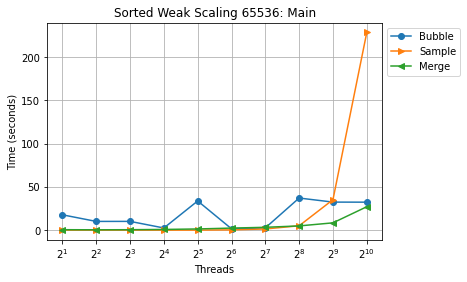

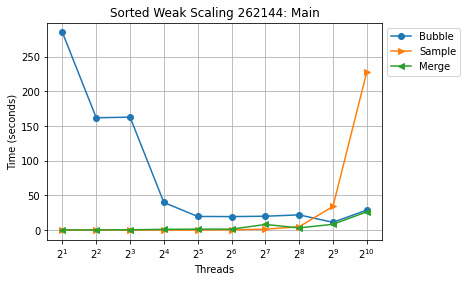

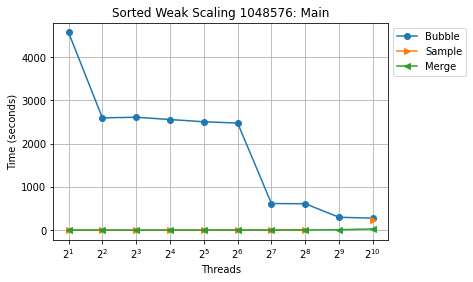

KeyError: "None of [MultiIndex([('Bubble Sort(Odd/Even)', 'Avg time/rank')],\n           )] are in the [columns]"

In [287]:
i = 0
for ctk in allctk:
    plot_mpl3(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        df2= ctk.dataframe[[temp[2]]].loc["main"],
        title=f"Sorted Weak Scaling {sizes[i]}: Main",
        xlabel="Threads",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

# Plot of 2

In [255]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

In [256]:
# i = 0
# for ctk in allctk:
#     plot_mpl3(
#         df=ctk.dataframe[[temp[0]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df2= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Bubble',
#         label2='Sample',
#         label3='Merge'
#     )
#     i += 1

In [257]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comm Graphs (for 3 then 2)

In [258]:
# i = 0
# for ctk in allctk:
#     plot_mpl3(
#         df=ctk.dataframe[[temp[0]]].loc["comm"],
#         df1= ctk.dataframe[[temp[1]]].loc["comm"],
#         df2= ctk.dataframe[[temp[2]]].loc["comm"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comm",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Bubble',
#         label2='Sample',
#         label3='Merge'
#     )
#     i += 1

In [259]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comm"],
#         df1= ctk.dataframe[[temp[2]]].loc["comm"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comm",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

In [260]:

#print (ctk.dataframe)
ctk = allctk[0]
temp = ctk.dataframe
temp = temp.loc[['main', 'comm', 'comp_large']]
temp.columns = temp.columns.droplevel(level=1)
#print(temp)
#print(temp.reset_index().drop("num_procs", axis=1).set_index("name"))
temp = temp.reset_index()
#print(temp.reset_index())
#print(temp.loc[num_procs==2])
divide_df = temp[temp['num_procs'] == 2]
temp = temp.reset_index().drop("num_procs", axis=1).drop("index", axis=1).set_index("name")
divide_df = divide_df.reset_index().drop("num_procs", axis=1).drop("index", axis=1).set_index("name")
print(divide_df)
print(temp)
#speedup_df = temp.reset_index().drop("num_procs", axis=1).set_index("name")
speedup_df = divide_df/temp
print(speedup_df)

            Bubble Sort(Odd/Even)  MergeSort  Sample Sort
name                                                     
main                    17.693144   0.515185     0.024925
comm                     5.218116   0.000953     0.000406
comp_large              10.411822   0.008505     0.011664
            Bubble Sort(Odd/Even)  MergeSort  Sample Sort
name                                                     
main                    17.693144   0.515185     0.024925
main                    10.058983   0.376272     0.018406
main                    10.105227   0.508723     0.028072
main                     2.481961   0.790029     0.023446
main                    33.671490   1.359942     0.043440
main                     1.542737   2.358479     0.318503
main                     2.587587   3.268643     1.349044
main                    37.059814   4.865206     5.029629
main                    32.364348   8.406288    35.160021
main                    32.279236  27.011016   228.241959
comm          

In [261]:
function_names = ['main', 'comm', 'comp_large']
xticks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

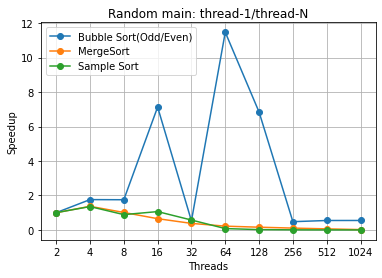

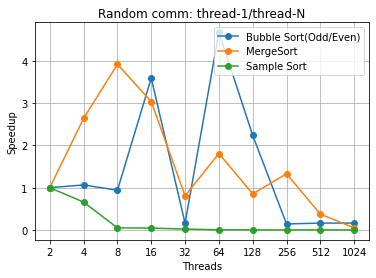

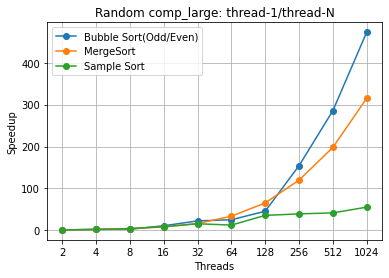

In [262]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"Random {name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False,
        xticks = xticks
    )